In [1]:
import os, sys, random

THIS_DIR = os.path.dirname(os.path.abspath("__file__"))
PARENT_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
sys.path.append(PARENT_DIR)

import numpy as np
from scipy.io import loadmat

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

font = {
        'size'   : 26}

matplotlib.rc('font', **font)

In [2]:
path = './../Results/NLO/'


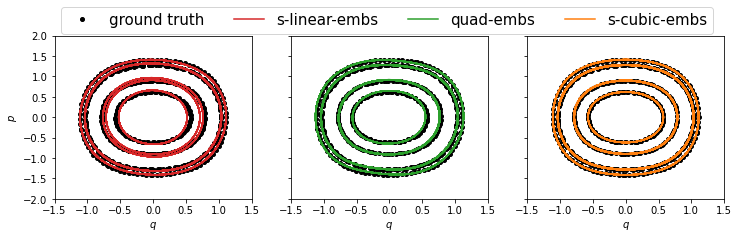

In [3]:
font = {'size'   : 18}

matplotlib.rc('font', **font)

prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

ground_truth_sol = loadmat(path + 'linear/' + 'sol_trajectories.mat' )['ground_truth_sol']
linear_sol = loadmat(path + 'linear/' + 'sol_trajectories.mat' )['learned_sol']
quad_sol = loadmat(path + 'quad/' + 'sol_trajectories.mat' )['learned_sol']
cubic_sol = loadmat(path + 'cubic/' + 'sol_trajectories.mat' )['learned_sol']

MARKERSIZE = 50

fig, ax = plt.subplots(1, 3, figsize=(12,3), sharey=True)
for i in range(0, 1):
    ax[0].plot(
        ground_truth_sol[0, :, i].reshape(-1, 1),
        ground_truth_sol[1, :, i].reshape(-1, 1),
        "o",
        markersize=4,
        markevery=MARKERSIZE,
        color="k",
        label="ground truth",
    )
for j in range(3):
    for i in range(1, 10,2):
        ax[j].plot(
            ground_truth_sol[0, :, i].reshape(-1, 1),
            ground_truth_sol[1, :, i].reshape(-1, 1),
            "o",
            markersize=4,
            markevery=MARKERSIZE,
            color="k",
        )
    
for i in range(0, 1):
    ax[0].plot(
        linear_sol[0, :, i].reshape(-1, 1),
        linear_sol[1, :, i].reshape(-1, 1),
        color=colors[3],
        label='s-linear-embs',
    )
    
    ax[1].plot(
        quad_sol[0, :, i].reshape(-1, 1),
        quad_sol[1, :, i].reshape(-1, 1),
        color=colors[2],
        label='quad-embs',
    )
    
    ax[2].plot(
        cubic_sol[0, :, i].reshape(-1, 1),
        cubic_sol[1, :, i].reshape(-1, 1),
        color=colors[1],
        label='s-cubic-embs',
    )
    
for i in range(1, 10,2):
    ax[0].plot(
        linear_sol[0, :, i].reshape(-1, 1),
        linear_sol[1, :, i].reshape(-1, 1),
        color=colors[3],
    )
    
    ax[1].plot(
        quad_sol[0, :, i].reshape(-1, 1),
        quad_sol[1, :, i].reshape(-1, 1),
        color=colors[2],
    )
    
    ax[2].plot(
        cubic_sol[0, :, i].reshape(-1, 1),
        cubic_sol[1, :, i].reshape(-1, 1),
        color=colors[1],
    )
    
    
    plt.ylim(-2,2)
    ax[0].set_xlim(-1.5,1.5)
    ax[1].set_xlim(-1.5,1.5)
    ax[2].set_xlim(-1.5,1.5)

    ax[0].set(ylabel = '$p$', xlabel = '$q$')
    
    ax[1].set( xlabel = '$q$')
    ax[2].set( xlabel = '$q$')
    
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels,loc = "upper center", ncol = 4, fontsize=15, bbox_to_anchor=(0.51, 1.05))

plt.savefig(path + f'phase_plot.png', dpi=300, transparent=False,  bbox_inches="tight", pad_inches=.2)
plt.savefig(path + f'phase_plot.pdf', transparent=False, bbox_inches="tight", pad_inches=.2)

In [4]:
Err_linear = loadmat(path + 'linear/' + 'sol_trajectories.mat' )['err']
Err_quad   = loadmat(path + 'quad/' + 'sol_trajectories.mat' )['err']
Err_cubic  = loadmat(path + 'cubic/' + 'sol_trajectories.mat' )['err']

In [5]:
err_linear = [(np.sqrt((e**2).sum())) for e in Err_linear]
err_quad   = [(np.sqrt((e**2).sum())) for e in Err_quad]
err_cubic  = [(np.sqrt((e**2).sum())) for e in Err_cubic]

# fun = lambda x: np.log10(np.sqrt(np.sum(x**2)/len(x.T)))
fun = lambda x: np.log10(np.sqrt(np.sum(x**2))/len(x.T))


err_linear = [fun(e) for e in Err_linear]
err_quad   = [fun(e) for e in Err_quad]
err_cubic  = [fun(e) for e in Err_cubic]

In [6]:
np.argmax(err_cubic), np.argmin(err_cubic),err_cubic

(3,
 17,
 [-5.180075883773458,
  -5.4284096468781335,
  -4.969292146640273,
  -4.712664623656276,
  -5.218633627674151,
  -5.698471184364563,
  -5.197437965985627,
  -5.045988920357887,
  -5.207743318377033,
  -4.927126307805527,
  -5.7482453719723035,
  -5.366624115197003,
  -5.200299962650201,
  -5.699269663460884,
  -5.074342963290468,
  -5.032891210575717,
  -5.161435445725638,
  -5.789373371871568,
  -5.344636551896609,
  -5.203768417504949,
  -5.611175218092446,
  -5.393822578982639,
  -5.195196564783322,
  -4.921261339743758,
  -5.505539898736967])

In [7]:
print(f'mean:   {[np.mean(err_linear), np.mean(err_quad), np.mean(err_cubic)]}')
print(f'median: {[np.median(err_linear), np.median(err_quad), np.median(err_cubic)]}')
print(f'max:    {[np.max(err_linear), np.max(err_quad), np.max(err_cubic)]}')
print(f'min:    {[np.min(err_linear), np.min(err_quad), np.min(err_cubic)]}')

mean:   [-1.8124444950890177, -1.8123298733537456, -5.2733490519998965]
median: [-1.779323196779393, -1.7754126920107924, -5.203768417504949]
max:    [-1.542971430152411, -1.5413100534565736, -4.712664623656276]
min:    [-2.393668483018584, -2.385483473673995, -5.789373371871568]


In [8]:
Errors = {}
Errors['type'] = ['s-linear-embs']*25 + ['quad-embs']*25 + ['s-cubic-embs']*25
Errors['value'] = err_linear
print(len(Errors['value']), len(err_linear))
Errors['value'].extend(err_quad)
Errors['value'].extend(err_cubic)
len(Errors['value'])

25 25


75

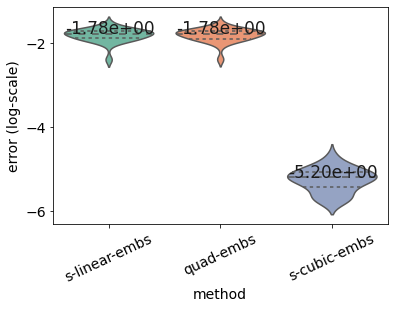

In [9]:
font = {
        'size'   : 14}

matplotlib.rc('font', **font)

ax = sns.violinplot(x ="type", y ="value", data = Errors, palette="Set2", split=True, scale="count", inner="quartile")

for l in ax.lines[1::3]:
    ax.text(l.get_data()[0][l.get_data()[0].nonzero()][0], l.get_data()[1][0], f'{l.get_data()[1][0]:.2e}',
            size='large', color = 'k')  

sns.set(font_scale = 1.7)
ax.set_ylabel('error (log-scale)')
ax.set_xlabel('method')
plt.xticks(rotation=25, ha='center')

plt.savefig(path + f'error_analysis.png', dpi=300, transparent=False,  bbox_inches="tight", pad_inches=.2)
plt.savefig(path + f'error_analysis.pdf', transparent=False, bbox_inches="tight", pad_inches=.2)